# Bayesian Logistic Regression Modules

This notebook tests the modules that perform logistic regression.

In [28]:
### Libraries

import matplotlib, matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pymc

% matplotlib inline

In [22]:
### Custom Modules

import bayes_lr
import game_predictions

In [46]:
### Reloading Examples

bayes_lr = reload(bayes_lr)
game_predictions = reload(game_predictions)

In [32]:
### Settings

# Games path.
games_path = '../../../data/games.csv'

# Pre-tournament statistics path.
stats_path = '../../../data/kenpom_summaries/summary15_pt.csv'

# Tournament bracket path.
bracket_path = '../../../data/tournament/2015_bracket.csv'

## Data

In [4]:
# Read games.
games = pd.read_csv(games_path)
# Trim to single group.
games = games[games.game_group == 1].reset_index(drop=True)
# 2014 games.
games_2014 = games[games.year == 2014].reset_index(drop=True)

In [33]:
# Read stats.
pre_tournament_stats = pd.read_csv(stats_path)

In [100]:
# Read bracket.
bracket = pd.read_csv(bracket_path, header=None).values.tolist()

## Model

In [14]:
# Features.
features = ['location_Home','diff_Tempo','diff_OE','diff_DE','diff_Pythag']
model_mcmc = bayes_lr.model_games(data=games_2014,features=features)

In [15]:
model_mcmc.sample(10000,2000)

 [-----------------100%-----------------] 10000 of 10000 complete in 22.6 sec

## Predict

In [30]:
y_hat_raw, y_hat, y_hat_accuracy = game_predictions.predict_games(games_2014, model_mcmc, features, 'pp')

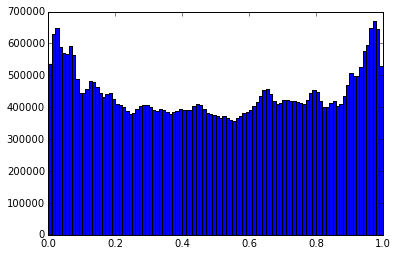

In [29]:
plt.hist(y_hat_raw.ravel(), bins=100);

## Simulate

In [357]:
### Reloading Examples

bayes_lr = reload(bayes_lr)
game_predictions = reload(game_predictions)

In [354]:
bracket = [['Duke','Michigan St.'],['Kentucky','Wisconsin']]

In [351]:
coefs_all = game_predictions.feature_coefficients(model_mcmc, features)
# print coefs_all.shape
c   = coefs_all[4000]
coefs = coefs_all[np.random.choice(len(coefs_all), size=40)]
# print coefs

(8000, 6)


In [355]:
tournament_teams, tournament_outcomes = game_predictions.simulate_tournament(bracket, pre_tournament_stats, features, model_mcmc)

In [358]:
print tournament_teams
print tournament_outcomes

['Duke' 'Kentucky' 'Michigan St.' 'Wisconsin']
[[ 5944.  2793.]
 [ 3987.  2684.]
 [ 2056.   155.]
 [ 4013.  2368.]]
